In [1]:
import pandas as pd
from PIL import Image
from transformers import pipeline

from utils.image_utils import scale_image

### Text classification

Question detection example.

In [ ]:
question_classifier = pipeline(
  'text-classification',
  model = 'shahrukhx01/question-vs-statement-classifier'
)

LABEL_MAP = {
  'LABEL_0': 'statement',
  'LABEL_1': 'question'
}

texts = [
  'Is this a question?',
  'This is not a question.'
]

for text in texts:
  result = question_classifier(text)
  label = LABEL_MAP[result[0]['label']]
  score = result[0]['score']
  print(f'Text: {text}')
  print(f'Classification: {label} (confidence: {score:.1%})\n')

Language detection example

In [ ]:
lang_detector = pipeline(
  'text-classification',
  model = 'papluca/xlm-roberta-base-language-detection'
)

texts = [
  'How are you?',
  'Ce mai faci?',
  'Bonjour, comment allez-vous?'
]

for text in texts:
  result = lang_detector(text)
  print(f'Text: {text}')
  print(f'{result}\n')

Spam classifier example

In [13]:
spam_detector = pipeline(
  'text-classification',
  model = 'mshenoda/roberta-spam'
)

print(spam_detector.model.config.id2label)

LABEL_MAP = {
  'LABEL_0': 'legit',
  'LABEL_1': 'spam'
}

texts = [
  'You just won big $$$ !!! Click below to claim your prize!',
  'The meeting for this evening was canceled. It will be rescheduled at a later date.',
  "Buy now! Limited time offer!",           # Commercial but maybe not spam
  "Can you send me the report by EOD?",     # Normal work message
  "FREE VIAGRA CLICK HERE NOW!!!",          # Obviously spam
  "Hey, long time no see! How are you?",    # Personal message
  "Congratulations! You've been selected",  # Could go either way
  "Congratulations! You've been selected to win $1000! Click here NOW!"
  "Meeting at 3pm in conference room B",    # Clearly legit
]

for text in texts:
  result = spam_detector(text)
  label = LABEL_MAP[result[0]['label']]
  score = result[0]['score']
  print(f'Text: {text}')
  print(f'Classification: {label} (confidence: {score:.1%})\n')

Device set to use mps:0


{0: 'LABEL_0', 1: 'LABEL_1'}
Text: You just won big $$$ !!! Click below to claim your prize!
Classification: spam (confidence: 100.0%)

Text: The meeting for this evening was canceled. It will be rescheduled at a later date.
Classification: legit (confidence: 100.0%)

Text: Buy now! Limited time offer!
Classification: spam (confidence: 100.0%)

Text: Can you send me the report by EOD?
Classification: legit (confidence: 100.0%)

Text: FREE VIAGRA CLICK HERE NOW!!!
Classification: spam (confidence: 100.0%)

Text: Hey, long time no see! How are you?
Classification: legit (confidence: 100.0%)

Text: Congratulations! You've been selected
Classification: legit (confidence: 100.0%)

Text: Congratulations! You've been selected to win $1000! Click here NOW!Meeting at 3pm in conference room B
Classification: spam (confidence: 100.0%)



### Text generation

In [5]:
generator = pipeline(
  'text-generation',
  model = 'openai-community/gpt2'
)

options = {
  'max_new_tokens': 100,
  'num_return_sequences': 2,
  'temperature': 0.7,  # Lower = more focused, Higher = more creative
  'top_k': 50,         # Consider top 50 tokens
  'top_p': 0.95,        # Nucleus sampling
  'do_sample': True,    # Enable sampling (more variety)
  'repetition_penalty': 1.2 # Penalizes repetition (GPT2 has the tendency to loop)
}

starting_text = 'In this course, we will teach you how to'

response = generator(starting_text, **options)

for idx, output in enumerate(response, 1):
  print(f'{idx:2}. {output["generated_text"]}\n')

Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 1. In this course, we will teach you how to use the N-terminal and write a simple program that reads from memory in C.
The next step is an introduction of writing code for reading data using std::vector, which can be used as well: it provides two important capabilities; first, vector_read() makes sure your programs read into storage before executing any commands (the same method called by nmap ), while second type alias tbuf defines if there are no variables associated with Ts. When working on programming languages such Async

 2. In this course, we will teach you how to use the following techniques in conjunction with your own skills and experience.
Pitfalls of Programming: The Real Problem (2nd edition) by Dave McNeill is a master class that explores topics such as relational database design using SQL injection programming language tools like OODB or F#; an overview on PHP concepts including Object oriented architecture/development processes used for data manipulation within C++11 s

### Text summarization

In [7]:
summarizer = pipeline(
  'summarization',
  model = 'facebook/bart-large-cnn'
)

options = {
  'max_length': 130,    # Max length of summary
  'min_length': 30,      # Min length of summary
  'do_sample': False     # Deterministic output
}

input_text = ''
with open('./data/article.txt', 'r') as f:
  input_text = f.read()

summary = summarizer(input_text)
print(summary[0]['summary_text'])


Device set to use mps:0


A quantum computer is a computer that exploits quantum mechanical phenomena. Classical physics cannot explain the operation of these quantum devices. A scalable quantum computer could perform some calculations exponentially faster than any modern "classical" computer. The current state of the art in quantum computing is largely experimental and impractical.


### Translation

In [9]:
translator = pipeline(
  'translation_en_to_fr',
  model='google-t5/t5-base'
)

input_text = 'Hello, how are you?'
result = translator(input_text)

print(result[0]['translation_text'])

Device set to use mps:0


Bonjour, comment êtes-vous?


### Zero-shot classification

0-shot classification allows for 'dynamic' classification tasks where the labels are not known in advance by the model. Before transformers, the classifiers were specialized pre-trained models capable of classification based on a pre-determined set of labels.

With this new type of classification, you can define the set of labels on-the-fly.

In [17]:
text_classifier = pipeline(
  'zero-shot-classification',
  model = 'facebook/bart-large-mnli'
)

options = {
  'candidate_labels': ['science fiction', 'action', 'comedy', 'drama'],
  'multi_label': True # Allow multiple categories
}

input_text = 'This is a great sci-fi action movie!'

result = text_classifier(input_text, **options)

df = pd.DataFrame({
  'Label': result['labels'],
  'Score': result['scores']
})
display(df)

Device set to use mps:0


,Label,Score
0,action,0.990489
1,science fiction,0.971906
2,drama,0.000525
3,comedy,0.000122


We can also do 0-shot image classification.

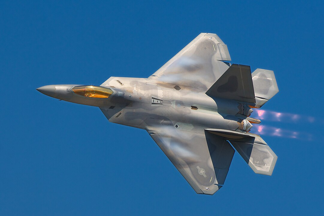

In [2]:
# Open an image and display it
image = Image.open('./data/image-001.jpg')
display(scale_image(image, 0.3))

In [3]:
img_classifier = pipeline(
  'zero-shot-image-classification',
  model='openai/clip-vit-large-patch14-336'
)

options = {
  'candidate_labels': ['airplane', 'car', 'train', 'bicycle']
}

result = img_classifier(image, **options)

df = pd.DataFrame(result)
display(df)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps:0


,score,label
0,0.992551,airplane
1,0.006379,car
2,0.001015,train
3,0.000055,bicycle


### Question & Answer (Q&A)

In [4]:
qa_model = pipeline(
  'question-answering',
  model='deepset/roberta-base-squad2'
)

context = '''
The Eiffel Tower is a wrought-iron lattice tower on the Champ de Mars 
in Paris, France. It is named after the engineer Gustave Eiffel, whose 
company designed and built the tower. Constructed from 1887 to 1889, 
it was initially criticized but has become a global cultural icon of 
France and one of the most recognizable structures in the world.
''';

question = 'When was the Eiffel Tower built?'

result = qa_model(question, context)

print(f'Answer: {result["answer"]}')
print(f'Confidence: {result["score"]:.1%}')
print(f'Start: {result["start"]}. End: {result["end"]}')

Device set to use mps:0


Answer: 1887 to 1889
Confidence: 77.5%
Start: 199. End: 211


/Users/afecioru/.virtualenvs/ai.ml/lib/python3.11/site-packages/transformers/pipelines/question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
